In [34]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [35]:
# Load pvals and LD

#efile = "../gwas/11_57523883__Adipose-Subcutaneous_pvals.txt"
#gfile = "../gwas/pvals_MED19_SCZ2.txt"
#lfile = "../gwas/11_57523883__Adipose-Subcutaneous_ld.txt"

efile = "../gwas/16_68014740__WholeBlood_pvals.txt"
gfile = "../gwas/pvals_LCAT_SCZ2.txt"
lfile = "../gwas/16_68014740__WholeBlood_ld.txt"

#efile = "../gwas/9_2622147__WholeBlood_pvals.txt"
#gfile = "../gwas/pvals_VLDLR_HGB.txt"
#lfile = "../gwas/9_2622147__WholeBlood_ld.txt"

expr_pvals = pd.read_csv(efile, sep="\t")[["BEGIN","PVALUE"]]
gwas_pvals = pd.read_csv(gfile, sep="\t")[["BEGIN","PVALUE"]]

ld = pd.read_csv(lfile, sep="\t")
ld["BEGIN"] = ld["snp1"].apply(lambda x: int(x.split(":")[1]))

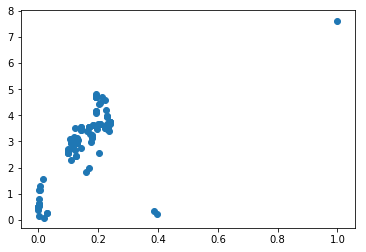

In [36]:
# For Expr - ld vs. pval
expr_ld = pd.merge(expr_pvals, ld, on=["BEGIN"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(expr_ld["rsquare"], expr_ld["PVALUE"].apply(lambda x: -1*np.log10(x)))

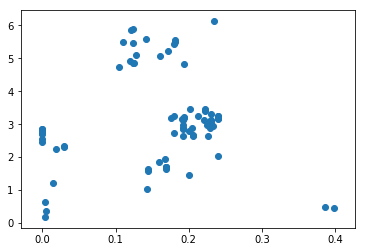

In [37]:
# For GWAS - ld vs. pval
gwas_ld = pd.merge(gwas_pvals, ld, on=["BEGIN"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(gwas_ld["rsquare"], gwas_ld["PVALUE"].apply(lambda x: -1*np.log10(x)))

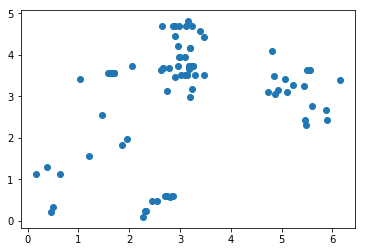

In [38]:
# Compare pvals
data = pd.merge(gwas_pvals, expr_pvals, on=["BEGIN"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data["PVALUE_x"].apply(lambda x: -1*np.log10(x)), data["PVALUE_y"].apply(lambda x: -1*np.log10(x)))